<a href="https://colab.research.google.com/github/Library-of-jade/ds1-section-project/blob/main/AI_8_%EA%B9%80%EB%AF%BC%EC%84%9D_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
#모든 데이터를 시각으로 확인
#pd.set_option('display.max_row', None)
#pd.set_option('display.max_columns', None)

## 분석에 필요한 사용자 정의 함수

In [ ]:
def yearEDA(y):
  for i in range(y.shape[0]):
    if y[i] < 50 :
      y[i] = y[i] + 2000
    elif y[i] >= 50 and y[i] <=99 :
      y[i] = y[i] + 1900
    else:
      continue
  
  return y

In [ ]:
# def convert_age(e):
#   age = []
#   for i in range(e.shape[0]):
#     if e.iloc[i,0]>=1980 and e.iloc[i,0]<1990:
#       age.append(1)
#     elif e.iloc[i,0]>=1990 and e.iloc[i,0]<2000:
#       age.append(2)
#     elif e.iloc[i,0]>=2000 and e.iloc[i,0]<2010:
#       age.append(3)
#     elif e.iloc[i,0]>=2010 and e.iloc[i,0]<=2020:
#       age.append(4)
#     else: 
#       continue
        
#   return pd.Series(age)
def convert_age(e):
  age = []
  for i in e.index:
    if e.loc[i,'Year']>=1980 and e.loc[i,'Year']<1990:
      age.append('1980s')
    elif e.loc[i,'Year']>=1990 and e.loc[i,'Year']<2000:
      age.append('1990s')
    elif e.loc[i,'Year']>=2000 and e.loc[i,'Year']<2010:
      age.append('2000s')
    elif e.loc[i,'Year']>=2010 and e.loc[i,'Year']<=2020:
      age.append('2010s')
    else: 
      continue
        
  return pd.Series(age)

In [ ]:
def platform(a):
  plat = []
  for i in a.index:
    if a.loc[i,'Platform'] in playstation:
      plat.append('playstation')
    elif a.loc[i,'Platform'] in nintendo:
      plat.append('nintendo')
    elif a.loc[i,'Platform'] in pc:
      plat.append('pc')
    elif a.loc[i,'Platform'] in xbox:
      plat.append('xbox')
    elif a.loc[i,'Platform'] in sega:
      plat.append('sega')
    else:
      plat.append('others')
  
  return pd.Series(plat)

## EDA


In [ ]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)
df.drop(df.columns[0], axis=1,inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
name = df['Platform'].unique()
name

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
playstation = ['PSP', 'PSV', 'PS', 'PS2', 'PS3', 'PS4']
nintendo = ['GC', 'GB', 'NES', 'SNES', 'GBA', 'N64', 'DS', '3DS', 'Wii','WiiU']
pc = ['PC']
xbox = ['XB', 'X360', 'XOne']
sega = ['DC', 'GG', 'SCD']
others = ['PCFX', '3DO', '2600', 'DC', 'GEN', 'WS', 'SAT', 'NG', 'TG16']

In [ ]:
yearEDA(df['Year'])

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16598, dtype: float64

In [ ]:
df.dropna(inplace=True)
df.drop([df[df['Year']==2020].index[0]], inplace=True)

df.set_index('Name',inplace=True)
df.reset_index(inplace=True)

df['Year'] = df['Year'].astype(int)

df['NA_Sales'] = df['NA_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * df['NA_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K', 'M'],[10**-3, 1]).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * df['EU_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K', 'M'],[10**-3, 1]).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * df['JP_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K', 'M'],[10**-3, 1]).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * df['Other_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K', 'M'],[10**-3, 1]).astype(float)

df['Total'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)

df['Age'] = convert_age(df)

df['company'] = platform(df)

#처리 시간이 오래걸림
# df1['NA_Sales'] = df1['NA_Sales'].replace({'K' : '*1e-3', 'M' : '*1'}, regex=True).map(pd.eval).astype(float)
# df1['EU_Sales'] = df1['EU_Sales'].replace({'K' : '*1e-3', 'M' : '*1'}, regex=True).map(pd.eval).astype(float)
# df1['JP_Sales'] = df1['JP_Sales'].replace({'K' : '*1e-3', 'M' : '*1'}, regex=True).map(pd.eval).astype(float)
# df1['Other_Sales'] = df1['Other_Sales'].replace({'K' : '*1e-3', 'M' : '*1'}, regex=True).map(pd.eval).astype(float)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Age,company
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000s,nintendo
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2000s,nintendo
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010s,playstation
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010s,nintendo
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010s,playstation
...,...,...,...,...,...,...,...,...,...,...,...,...
16235,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,2000s,nintendo
16236,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,2000s,playstation
16237,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,2010s,playstation
16238,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,2010s,playstation


In [ ]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total          float64
Age             object
company         object
dtype: object

In [ ]:
Action = df[df['Genre']=='Action']
Action.set_index('Name', inplace=True)
Action.reset_index(inplace=True)

Sports = df[df['Genre']=='Sports']
Sports.set_index('Name', inplace=True)
Sports.reset_index(inplace=True)

Misc = df[df['Genre']=='Misc']
Misc.set_index('Name', inplace=True)
Misc.reset_index(inplace=True)

Role_Playing = df[df['Genre']=='Role-Playing']
Role_Playing.set_index('Name', inplace=True)
Role_Playing.reset_index(inplace=True)

Shooter = df[df['Genre']=='Shooter'] 
Shooter.set_index('Name', inplace=True)
Shooter.reset_index(inplace=True)

Adventure = df[df['Genre']=='Adventure']
Adventure.set_index('Name', inplace=True)
Adventure.reset_index(inplace=True)

Racing = df[df['Genre']=='Racing']
Racing.set_index('Name', inplace=True)
Racing.reset_index(inplace=True)

Platform = df[df['Genre']=='Platform']
Platform.set_index('Name', inplace=True)
Platform.reset_index(inplace=True)

Simulation = df[df['Genre']=='Simulation']
Simulation.set_index('Name', inplace=True)
Simulation.reset_index(inplace=True)

Fighting = df[df['Genre']=='Fighting ']
Fighting.set_index('Name', inplace=True)
Fighting.reset_index(inplace=True)

Strategy = df[df['Genre']=='Strategy']
Strategy.set_index('Name', inplace=True)
Strategy.reset_index(inplace=True)

Puzzle = df[df['Genre']=='Puzzle']
Puzzle.set_index('Name', inplace=True)
Puzzle.reset_index(inplace=True)

In [ ]:
Action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Age,company
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000s,nintendo
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2000s,nintendo
2,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,2000s,playstation
3,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,2010s,playstation
4,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36,2000s,playstation
...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08,2010s,pc
3236,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27,2010s,xbox
3237,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,1.43,2000s,nintendo
3238,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,2000s,playstation


## 필수  분석 1번

In [ ]:
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [ ]:
df1.dtypes

Genre           object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
df1_sum = df1.groupby(['Genre']).sum() #각나라별 특정장르에 대해 얼마나 구입을 하는지 총합
df1_sum.reset_index(inplace=True)

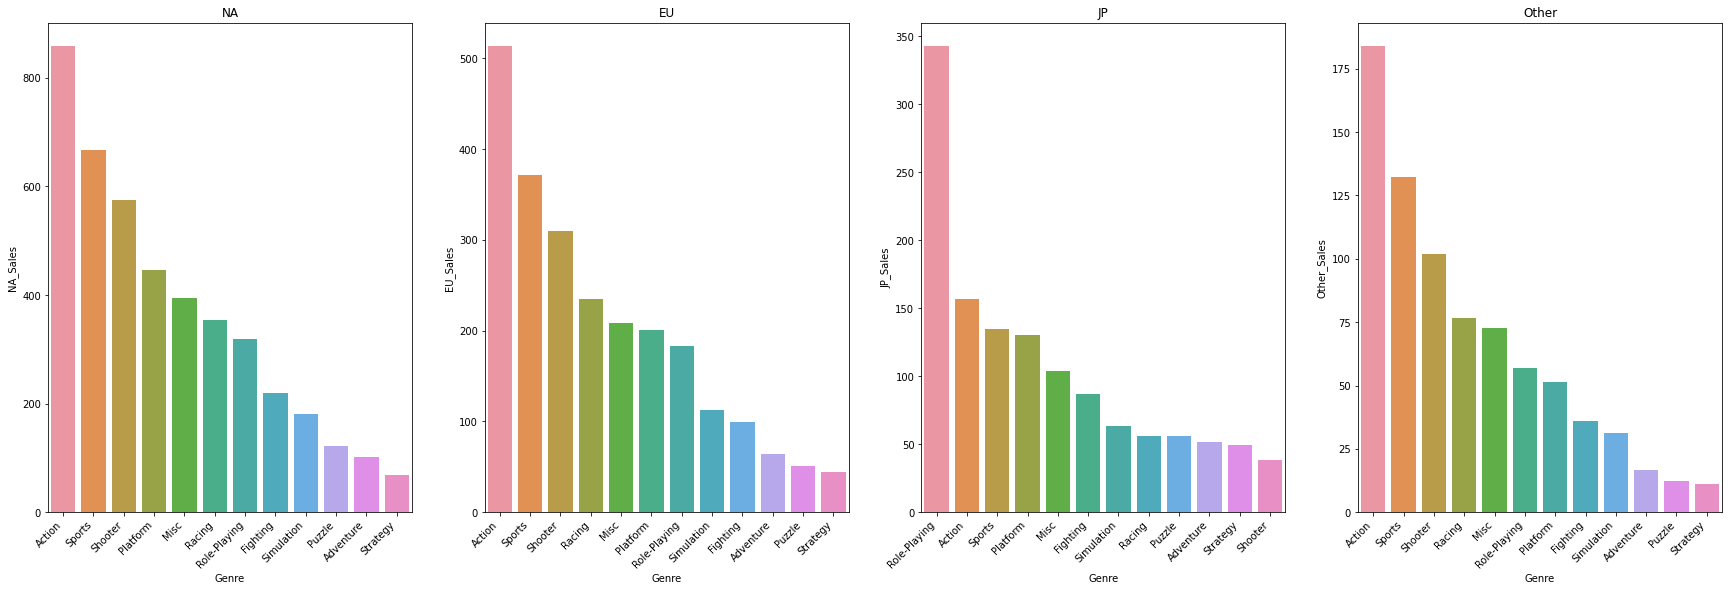

In [ ]:
fig, ax =  plt.subplots(1, 4, figsize=(30, 10))
fig.autofmt_xdate(rotation=45)


ax[0].set_title('NA')
sns.barplot(x='Genre', y='NA_Sales', data=df1_sum.sort_values('NA_Sales', ascending=False), ax=ax[0])

ax[1].set_title('EU')
sns.barplot(x='Genre', y='EU_Sales', data=df1_sum.sort_values('EU_Sales', ascending=False), ax=ax[1])

ax[2].set_title('JP')
sns.barplot(x='Genre', y='JP_Sales', data=df1_sum.sort_values('JP_Sales', ascending=False), ax=ax[2])

ax[3].set_title('Other')
sns.barplot(x='Genre', y='Other_Sales', data=df1_sum.sort_values('Other_Sales', ascending=False), ax=ax[3])

In [ ]:
count = pd.DataFrame(df1['Genre'].value_counts())
count

,Genre
Action,3240
Sports,2299
Misc,1681
Role-Playing,1465
Shooter,1280
Adventure,1268
Racing,1219
Platform,873
Simulation,845
Fighting,835


In [ ]:
df1_mean = df1.groupby(['Genre']).mean() #각나라별 특정장르에 대해 평균적으로 얼마나 구입을 하는지 확인
df1_mean.reset_index(inplace=True)

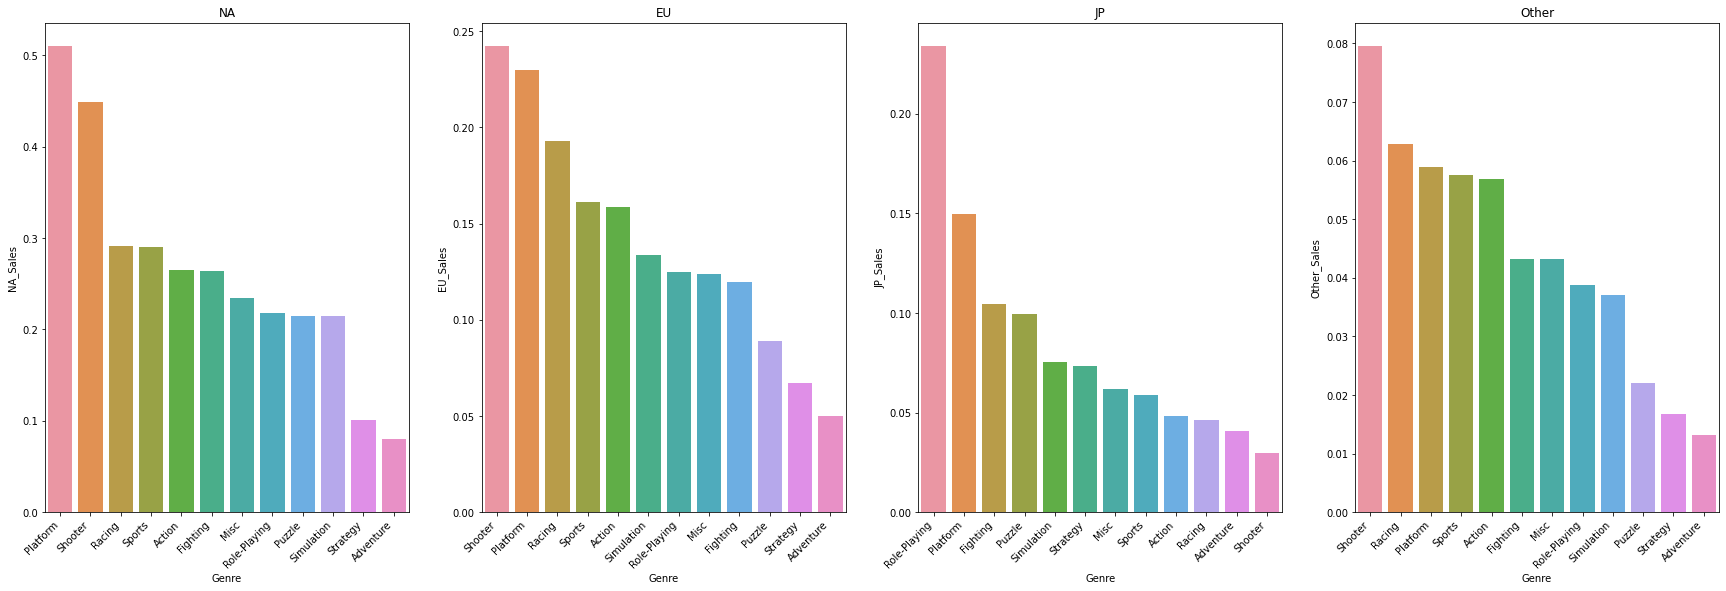

In [ ]:
fig, ax =  plt.subplots(1, 4, figsize=(30, 10))
fig.autofmt_xdate(rotation=45)
ax[0].set_title('NA')
sns.barplot(x='Genre', y='NA_Sales', data=df1_mean.sort_values('NA_Sales', ascending=False), ax=ax[0])

ax[1].set_title('EU')
sns.barplot(x='Genre', y='EU_Sales', data=df1_mean.sort_values('EU_Sales', ascending=False), ax=ax[1])

ax[2].set_title('JP')
sns.barplot(x='Genre', y='JP_Sales', data=df1_mean.sort_values('JP_Sales', ascending=False), ax=ax[2])

ax[3].set_title('Other')
sns.barplot(x='Genre', y='Other_Sales', data=df1_mean.sort_values('Other_Sales', ascending=False), ax=ax[3])

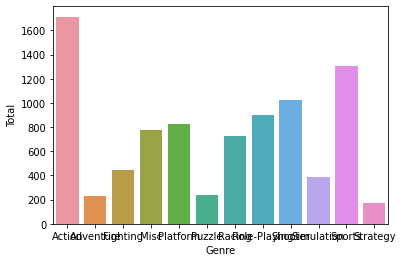

In [ ]:
dfe = df[['Genre', 'Total']].groupby(['Genre']).sum()
dfe.reset_index(inplace=True)
sns.barplot(x='Genre', y='Total',data=dfe)

## 필수 분석 2번

In [ ]:
df2 = df[['Age', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]


In [ ]:
df2.dtypes

Age             object
Genre           object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
df2 = df2.groupby(['Age','Genre']).mean()
df2.reset_index(inplace=True)
df2['sum'] = df2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1) #level=['NA_Sales	EU_Sales	JP_Sales	Other_Sales'])
df2

,Age,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,1980s,Action,0.574242,0.065000,0.125909,0.009091,0.774242
1,1980s,Adventure,1.285000,0.260000,0.805000,0.040000,2.390000
2,1980s,Fighting,0.880000,0.172500,0.730000,0.027500,1.810000
3,1980s,Misc,0.418750,0.025000,0.607500,0.003750,1.055000
4,1980s,Platform,2.252727,0.401212,0.983333,0.067576,3.704848
5,1980s,Puzzle,2.299474,0.285789,0.656316,0.061053,3.302632
6,1980s,Racing,0.852500,0.170000,0.461250,0.028750,1.512500
7,1980s,Role-Playing,0.117778,0.000000,1.408889,0.167778,1.694444
8,1980s,Shooter,1.694667,0.094333,0.176667,0.026667,1.992333
9,1980s,Simulation,0.140000,0.023333,0.000000,0.006667,0.170000


In [ ]:
scale = df2[['Age', 'sum']].groupby(['Age']).sum()
scale

,sum
Age,
1980s,19.850546
1990s,8.685384
2000s,5.714741
2010s,5.748332


In [ ]:
age_80 = df2[df2['Age'] == '1980s']
age_80['sum2'] = age_80['sum'] / scale['sum'][0]
age_90 = df2[df2['Age'] == '1990s']
age_90['sum2'] = age_90['sum'] / scale['sum'][1]
age_00 = df2[df2['Age'] == '2000s']
age_00['sum2'] = age_00['sum'] / scale['sum'][2]
age_10 = df2[df2['Age'] == '2010s']
age_10['sum2'] = age_10['sum'] / scale['sum'][3]

Text(0, 0.5, 'Mean')

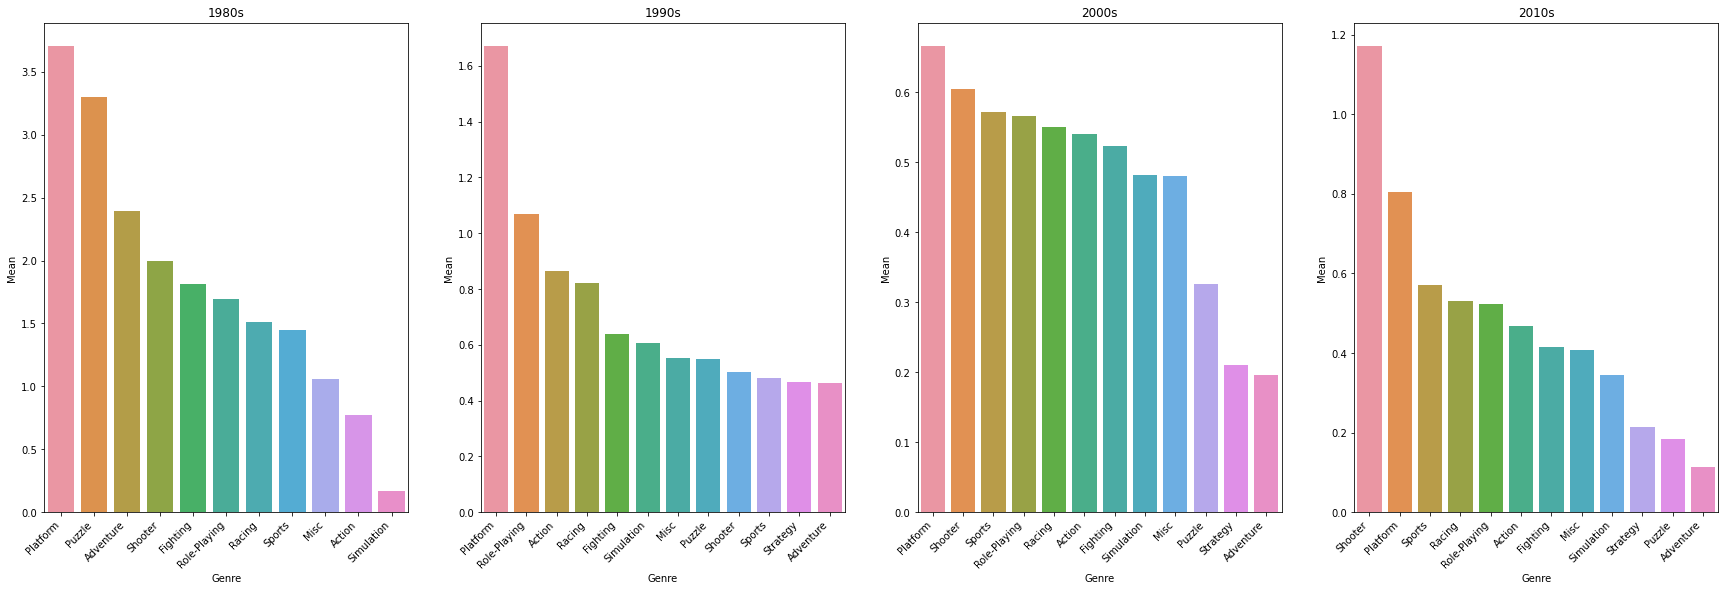

In [ ]:
fig, ax =  plt.subplots(1, 4, figsize=(30, 10))
fig.autofmt_xdate(rotation=45)
ax[0].set_title('1980s')
sns.barplot(x='Genre', y='sum', data=age_80.sort_values(by=['sum'], ascending=False), ax=ax[0])
ax[0].set_ylabel('Mean')

ax[1].set_title('1990s')
sns.barplot(x='Genre', y='sum', data=age_90.sort_values(by=['sum'], ascending=False), ax=ax[1])
ax[1].set_ylabel('Mean')

ax[2].set_title('2000s')
sns.barplot(x='Genre', y='sum', data=age_00.sort_values(by=['sum'], ascending=False), ax=ax[2])
ax[2].set_ylabel('Mean')

ax[3].set_title('2010s')
sns.barplot(x='Genre', y='sum', data=age_10.sort_values(by=['sum'], ascending=False), ax=ax[3])
ax[3].set_ylabel('Mean')

Text(0, 0.5, 'Relative Preference')

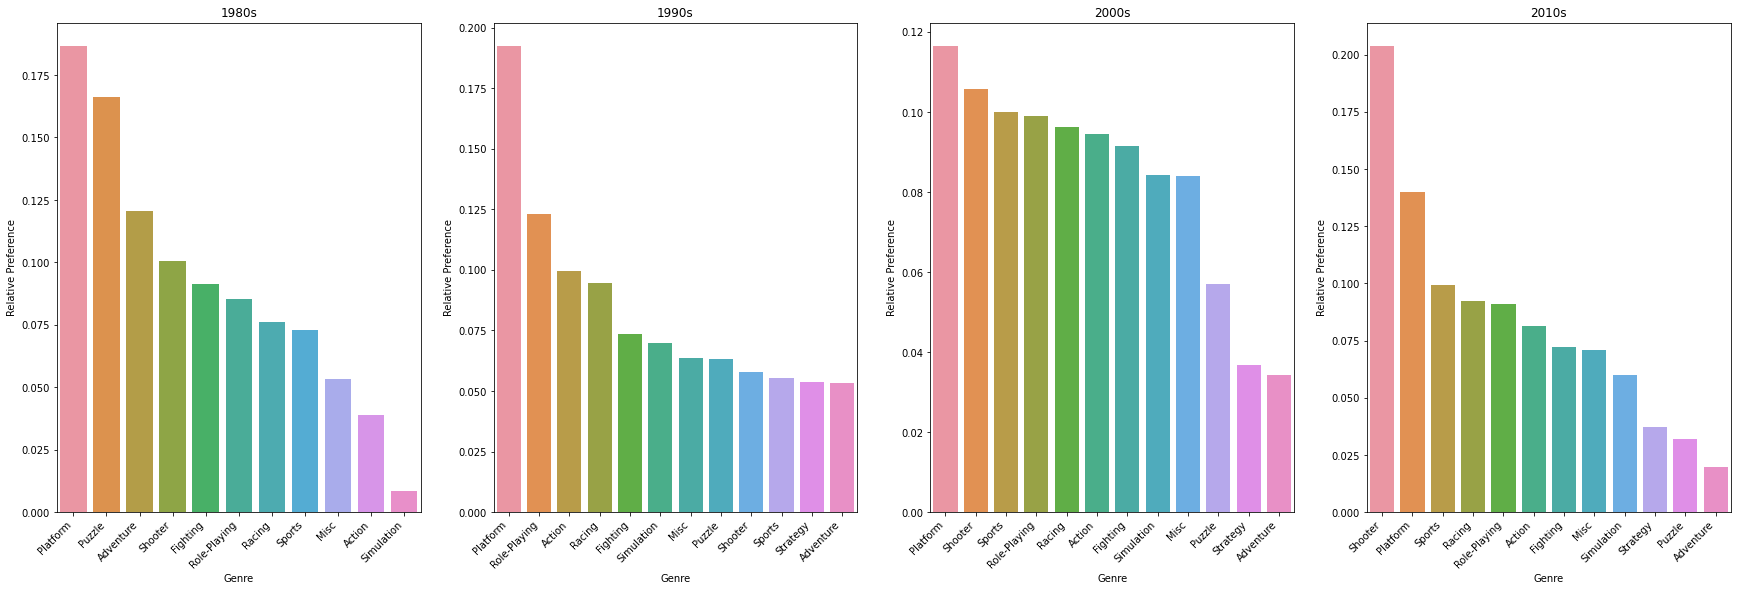

In [ ]:
fig, ax =  plt.subplots(1, 4, figsize=(30, 10))
fig.autofmt_xdate(rotation=45)
ax[0].set_title('1980s')
sns.barplot(x='Genre', y='sum2', data=age_80.sort_values(by=['sum2'], ascending=False), ax=ax[0])
ax[0].set_ylabel('Relative Preference')

ax[1].set_title('1990s')
sns.barplot(x='Genre', y='sum2', data=age_90.sort_values(by=['sum2'], ascending=False), ax=ax[1])
ax[1].set_ylabel('Relative Preference')

ax[2].set_title('2000s')
sns.barplot(x='Genre', y='sum2', data=age_00.sort_values(by=['sum2'], ascending=False), ax=ax[2])
ax[2].set_ylabel('Relative Preference')

ax[3].set_title('2010s')
sns.barplot(x='Genre', y='sum2', data=age_10.sort_values(by=['sum2'], ascending=False), ax=ax[3])
ax[3].set_ylabel('Relative Preference')

ValueError: ignored

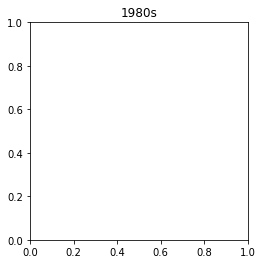

In [ ]:
plt.title('1980s')
plt.pie(age_80['sum2'],labels=age_80['Genre'],autopct='%.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x7f076edc1c90>,
 [Text(1.0466838052337908, 0.33830904785611626, 'Action'),
  Text(0.7724306070015031, 0.7831672601477219, 'Adventure'),
  Text(0.40797425195821363, 1.0215463815897623, 'Fighting'),
  Text(-0.056097789615840485, 1.0985686314474017, 'Misc'),
  Text(-0.8299777334649627, 0.721898165915639, 'Platform'),
  Text(-1.0958475378020742, -0.0954891297118776, 'Puzzle'),
  Text(-0.918490185657482, -0.605289830453878, 'Racing'),
  Text(-0.3294072466781569, -1.0495193499101938, 'Role-Playing'),
  Text(0.287424916846735, -1.0617847791222323, 'Shooter'),
  Text(0.6788737458033908, -0.8655232158982643, 'Simulation'),
  Text(0.9586634378991122, -0.539411172330955, 'Sports'),
  Text(1.0843062887939503, -0.1851482435290452, 'Strategy')],
 [Text(0.5709184392184313, 0.18453220792151795, '10.0%'),
  Text(0.4213257856371835, 0.4271821418987573, '5.3%'),
  Text(0.22253141015902558, 0.5572071172307793, '7.4%'),
  Text(-0.030598794335912987, 0.5992192535167645, '6.4%

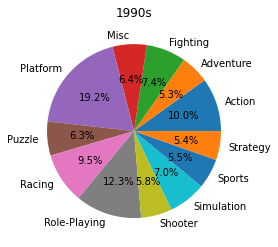

In [ ]:
plt.title('1990s')
plt.pie(age_90['sum2'],labels=age_90['Genre'],autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7f076e3eaa50>,
 [Text(1.051834026654943, 0.32193971542953265, 'Action'),
  Text(0.8401104835872825, 0.7100805414646587, 'Adventure'),
  Text(0.5018792827651539, 0.9788346058099575, 'Fighting'),
  Text(-0.0853880839184456, 1.0966808446967315, 'Misc'),
  Text(-0.7149526013473705, 0.8359681679505674, 'Platform'),
  Text(-1.0449100423373638, 0.34374845952022615, 'Puzzle'),
  Text(-1.085281758014519, -0.17934186828767826, 'Racing'),
  Text(-0.784538316839015, -0.77103802073011, 'Role-Playing'),
  Text(-0.16587062854917733, -1.0874221510456283, 'Shooter'),
  Text(0.4740310011613999, -0.9926200733099856, 'Simulation'),
  Text(0.9401289816224403, -0.5711020030726154, 'Sports'),
  Text(1.0926357326643592, -0.12707145904969713, 'Strategy')],
 [Text(0.5737276509026962, 0.17560348114338142, '9.5%'),
  Text(0.45824208195669947, 0.38731665898072287, '3.4%'),
  Text(0.2737523360537203, 0.5339097849872495, '9.2%'),
  Text(-0.04657531850097032, 0.5981895516527627, '8.4%

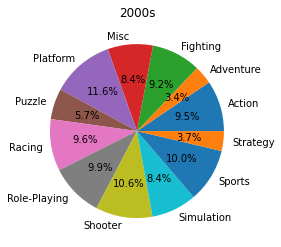

In [ ]:
plt.title('2000s')
plt.pie(age_00['sum2'],labels=age_00['Genre'],autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7f076e37d3d0>,
 [Text(1.0643751508588812, 0.2776788400907317, 'Action'),
  Text(0.9247790948577295, 0.5956371594470236, 'Adventure'),
  Text(0.716549360888113, 0.834599912179984, 'Fighting'),
  Text(0.28142794745661276, 1.0633900086000236, 'Misc'),
  Text(-0.4329555238948862, 1.0112119037713632, 'Platform'),
  Text(-0.8915935791872613, 0.644252194060718, 'Puzzle'),
  Text(-1.0697505249644292, 0.25619097239818606, 'Racing'),
  Text(-1.0365619805084287, -0.3681565707201812, 'Role-Playing'),
  Text(-0.3283162872163731, -1.0498611410793601, 'Shooter'),
  Text(0.5520679577066667, -0.9514310117258057, 'Simulation'),
  Text(0.940750959100529, -0.5700768658272628, 'Sports'),
  Text(1.0925222267778383, -0.12804368003300104, 'Strategy')],
 [Text(0.5805682641048442, 0.15146118550403545, '8.1%'),
  Text(0.5044249608314887, 0.3248929960620128, '2.0%'),
  Text(0.39084510593897076, 0.4552363157345366, '7.2%'),
  Text(0.15350615315815241, 0.580030913781831, '7.1%'),
  

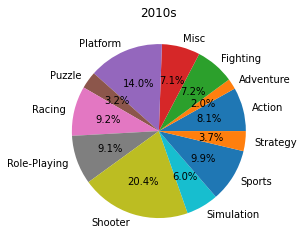

In [ ]:
plt.title('2010s')
plt.pie(age_10['sum2'],labels=age_10['Genre'],autopct='%.1f%%')

In [ ]:
test = df[['Genre','Age', 'Total']].groupby(['Genre', 'Age']).mean()


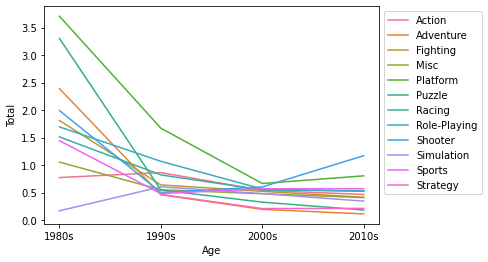

In [ ]:
sns.lineplot(x='Age', y='Total',hue='Genre', data=test, legend=False)
label= ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
plt.legend(labels = label, loc = 2, bbox_to_anchor = (1,1))

## 필수 분석 3번

In [ ]:
static = df['Total'].describe()
print(static)

count    16240.000000
mean         0.539106
std          1.563952
min          0.000000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Total, dtype: float64


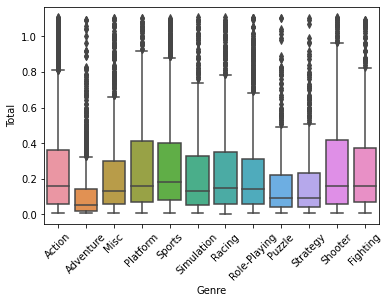

In [ ]:
plt.xticks(rotation=45)
IQR = static['75%'] - static['25%']
whis = 1.5 * IQR
bound = static['75%'] + whis

a =  df[df['Total']<=bound]
sns.boxplot(x='Genre', y='Total', data = a)

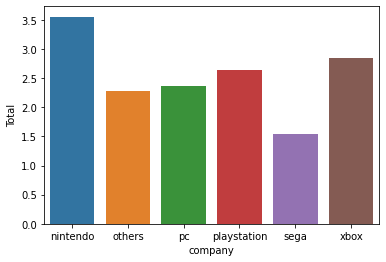

In [ ]:
high = df[df['Total']>bound]
w = high[['company', 'Total']].groupby(['company']).mean()
w.reset_index(inplace=True)
q = high[['company', 'Total']].groupby(['company']).max()
q.reset_index(inplace=True)
sns.barplot(x='company', y='Total', data=w)
#sns.lineplot(x='company', y='Total', data=q, color='r')

In [ ]:
NA = np.array(df['NA_Sales'])
EU = np.array(df['EU_Sales'])
JP = np.array(df['JP_Sales'])
Other = np.array(df['Other_Sales'])

In [ ]:
cor = pd.DataFrame({'NA_EU': [np.corrcoef(NA, EU)[0][1]]})

,NA_EU
0,0.768908


In [ ]:
cor['NA_JP']=np.corrcoef(NA, JP)[0][1]


,NA_EU,NA_JP
0,0.768908,0.449359


In [ ]:
cor['NA_Other']=np.corrcoef(NA, Other)[0][1]

In [ ]:
cor['EU_JP']=np.corrcoef(EU, JP)[0][1]

In [ ]:
cor['EU_Other']=np.corrcoef(EU, Other)[0][1]

In [ ]:
cor['JP_Other']=np.corrcoef(JP, Other)[0][1]

In [ ]:
cor = cor.T.reset_index()
cor

,index,0
0,NA_EU,0.768908
1,NA_JP,0.449359
2,NA_Other,0.634708
3,EU_JP,0.432347
4,EU_Other,0.728084
5,JP_Other,0.285393


In [ ]:
cor.columns=['local', 'correlation_coeficient']

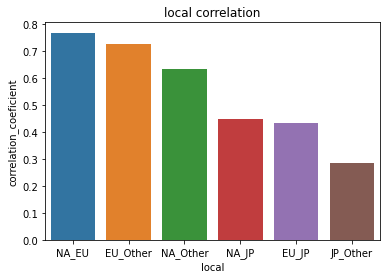

In [ ]:
plt.title('local correlation')
sns.barplot(x='local', y='correlation_coeficient', data=cor.sort_values(by=['correlation_coeficient'], ascending=False))

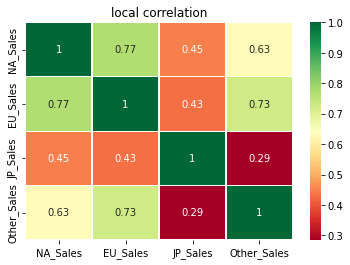

In [ ]:
plt.title('local correlation')
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [ ]:
t1 = df[['Year', 'NA_Sales']].groupby(['Year']).sum()
t2 = df[['Year', 'EU_Sales']].groupby(['Year']).sum()
t3 = df[['Year', 'JP_Sales']].groupby(['Year']).sum()

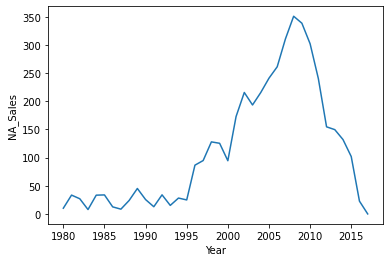

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=t1)

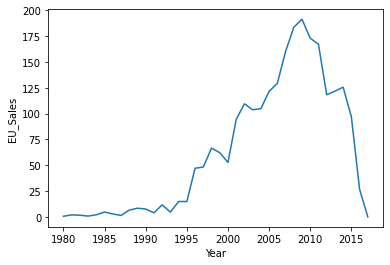

In [ ]:
sns.lineplot(x='Year', y='EU_Sales', data=t2)

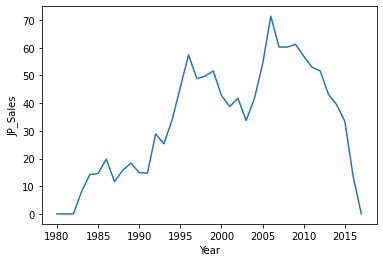

In [ ]:
sns.lineplot(x='Year', y='JP_Sales', data=t3)

([<matplotlib.patches.Wedge at 0x7f8cfdf21490>,
 [Text(0.8878830553571226, 0.6493563582576988, 'Action'),
  Text(-0.12757513207379131, 1.0925770387832405, 'Sports'),
  Text(-0.8919455671236611, 0.6437647903453952, 'Shooter'),
  Text(-1.0913261686061657, -0.13786657939974734, 'Role-Playing'),
  Text(-0.7655040695951982, -0.7899389339899573, 'Platform'),
  Text(-0.1754902593848843, -1.0859112159200799, 'Misc'),
  Text(0.3888223349010419, -1.028988431364562, 'Racing'),
  Text(0.7729149751327286, -0.7826892366805447, 'Fighting'),
  Text(0.9753570917944091, -0.5086045059634773, 'Simulation'),
  Text(1.0600960537332098, -0.29359216075923394, 'Puzzle'),
  Text(1.0899783636994254, -0.14814576155639256, 'Adventure'),
  Text(1.0992184208614846, -0.04145917556807152, 'Strategy')],
 [Text(0.4842998483766123, 0.354194377231472, '20.1%'),
  Text(-0.06958643567661343, 0.5959511120635858, '13.5%'),
  Text(-0.4865157638856333, 0.3511444310974883, '12.9%'),
  Text(-0.5952688192397267, -0.075199952399862

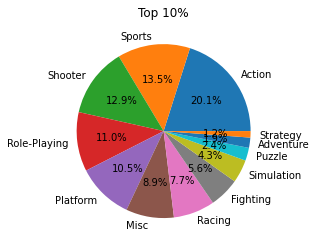

In [ ]:
good = df.sort_values(by=['Total'],ascending=False).iloc[0:1000]
df6 = good['Genre'].value_counts()
df6 = df6 / df6.sum()
plt.title('Top 10%')
plt.pie(df6,labels=df6.index,autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7f8cfdf90450>,
 [Text(0.8911167001030529, 0.6449116426282332, 'Action'),
  Text(-0.14065572033549112, 1.090970195897626, 'Sports'),
  Text(-0.8633570667686756, 0.6816264191333761, 'Misc'),
  Text(-1.09796669513274, 0.06685159967636217, 'Role-Playing'),
  Text(-0.9777284364944903, -0.5040308566645894, 'Adventure'),
  Text(-0.6211767843578524, -0.9078212393278967, 'Shooter'),
  Text(-0.13975606486035705, -1.091085808877903, 'Racing'),
  Text(0.2969473450271893, -1.0591611181880232, 'Simulation'),
  Text(0.6204280422293978, -0.9083331131338308, 'Fighting'),
  Text(0.8739295502483925, -0.6680173210348984, 'Platform'),
  Text(1.0299152693165834, -0.38636063208943744, 'Strategy'),
  Text(1.0931413437870963, -0.12264584176946876, 'Puzzle')],
 [Text(0.4860636546016652, 0.35176998688812716, '19.9%'),
  Text(-0.07672130200117697, 0.5950746523077959, '14.2%'),
  Text(-0.47092203641927755, 0.3717962286182051, '10.4%'),
  Text(-0.5988909246178582, 0.0364645089143793

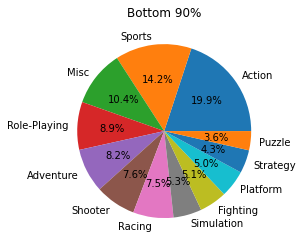

In [ ]:
bad = df.sort_values(by=['Total'],ascending=False).iloc[1000:]
df7 = bad['Genre'].value_counts()
df7 = df7 / df7.sum()
plt.title('Bottom 90%')
plt.pie(df7,labels=df7.index,autopct='%.1f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

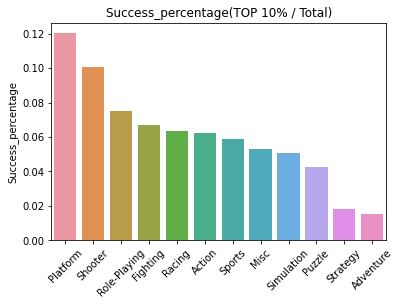

In [ ]:
good3 = df.sort_values(by=['Total'],ascending=False).iloc[0:1000]
publisher3=df['Genre'].value_counts()
df10 = good3['Genre'].value_counts()
#df8 = df8 / df8.sum()
#df8.sort_values(ascending=False).iloc[0:10]
publisher3 = pd.concat([df10, publisher3], axis=1)
publisher3.fillna(0, inplace=True)
publisher3.columns=['10%','total']
publisher3['Success_percentage'] = publisher3['10%'] / publisher3['total']
publisher3.sort_values(by=['Success_percentage'],ascending=False, inplace=True)
sns.barplot(x=publisher3.index ,y='Success_percentage', data=publisher3)
plt.title('Success_percentage(TOP 10% / Total)')
plt.xticks(rotation=45)

In [ ]:
good2 = df.sort_values(by=['Total'],ascending=False).iloc[0:1000]
publisher=df['Publisher'].value_counts()
df8 = good2['Publisher'].value_counts()
#df8 = df8 / df8.sum()
#df8.sort_values(ascending=False).iloc[0:10]
publisher = pd.concat([df8, publisher], axis=1)
publisher.fillna(0, inplace=True)
publisher.columns=['10%','total']
publisher['Success_percentage'] = publisher['10%'] / publisher['total']
publisher[publisher['total']>20].sort_values(by=['Success_percentage'],ascending=False).iloc[0:10]

,10%,total,Success_percentage
Nintendo,229.0,692,0.330925
Microsoft Game Studios,38.0,189,0.201058
Enix Corporation,6.0,30,0.200000
SquareSoft,9.0,51,0.176471
LucasArts,15.0,89,0.168539
Bethesda Softworks,10.0,69,0.144928
Take-Two Interactive,53.0,411,0.128954
Sony Computer Entertainment,87.0,679,0.128130
Electronic Arts,149.0,1332,0.111862
Virgin Interactive,6.0,61,0.098361


In [ ]:
bad2 = df.sort_values(by=['Total'],ascending=False).iloc[1000:]
publisher2=df['Publisher'].value_counts()
df9 = bad2['Publisher'].value_counts()
# df9 = df9 / df9.sum()
# df9.sort_values(ascending=False).iloc[0:10]
publisher2 = pd.concat([df9, publisher2], axis=1)
publisher2.fillna(0, inplace=True)
publisher2.columns=['90%','total']
publisher2['Fail_percentage'] = publisher2['90%'] / publisher2['total']
publisher2[publisher2['total']>20].sort_values(by=['Fail_percentage']).iloc[0:100]

,90%,total,Fail_percentage
Nintendo,463.0,692,0.669075
Microsoft Game Studios,151.0,189,0.798942
Enix Corporation,24.0,30,0.800000
SquareSoft,42.0,51,0.823529
LucasArts,74.0,89,0.831461
...,...,...,...
Takara Tomy,37.0,37,1.000000
SouthPeak Games,37.0,37,1.000000
TDK Mediactive,36.0,36,1.000000
BAM! Entertainment,35.0,35,1.000000


In [ ]:
cors= pd.crosstab(good['Genre'], good['Platform'])
cors 

Platform,2600,3DS,DS,GB,GBA,GC,GEN,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,4,5,1,0,2,0,2,3,0,15,20,18,9,3,1,3,0,16,1,2
Adventure,0,0,1,1,0,0,0,0,1,0,1,0,3,0,0,0,0,0,1,0,0
Fighting,0,1,0,0,0,1,0,1,1,0,6,6,1,0,0,3,1,1,1,0,0
Misc,0,0,10,1,1,0,0,0,0,1,3,5,1,1,0,0,14,1,4,0,0
Platform,1,2,4,6,4,1,2,3,3,0,8,4,2,0,2,6,6,3,0,0,0
Puzzle,1,0,4,2,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0
Racing,0,1,1,1,1,1,0,4,1,0,5,7,5,0,2,1,1,1,3,0,0
Role-Playing,0,4,7,4,3,0,0,0,2,5,4,5,5,2,3,2,0,0,9,0,1
Shooter,1,0,0,0,0,0,0,2,1,2,2,10,15,9,0,1,1,1,23,2,9


In [ ]:
yp = pd.crosstab(df['company'], df['Year'])
#yp.drop(['sega', 'others'], inplace=True)
yp[[2000,	2001,	2002,	2003,	2004,	2005,	2006,	2007,	2008,	2009,	2010,	2011,	2012,	2013,	2014,	2015,	2016,	2017]]

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
company,,,,,,,,,,,,,,,,,,
nintendo,77,147,350,293,262,344,325,570,771,730,579,411,180,153,116,118,45,0
others,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pc,7,15,19,33,31,37,52,62,75,109,87,137,61,38,44,50,38,0
playstation,241,275,299,259,273,356,473,437,429,417,405,380,305,260,295,325,197,3
sega,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
xbox,1,33,157,189,174,197,155,125,147,172,182,205,106,94,125,118,62,0


In [ ]:
yp.drop(['2600','3DO', 'DC', 'GBA', 'GB', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'SAT', 'SCD','SNES', 'TG16', 'WS', 'XB'], inplace=True)
yp.drop([1980,	1981,	1982,	1983,	1984,	1985,	1986,	1987,	1988,	1989,	1990,	1991,	1992,	1993,	1994,	1995,	1996,	1997,	1998,	1999,	2000], axis=1,inplace=True)
yp

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Platform,,,,,,,,,,,,,,,,,
3DS,0,0,0,0,0,0,0,0,0,0,116,93,90,78,86,35,0
DS,0,0,0,23,117,202,377,490,405,326,152,23,9,1,0,0,0
PC,15,19,33,31,37,52,62,75,109,87,137,61,38,44,50,38,0
PS2,184,280,256,258,260,258,214,190,96,36,7,0,0,0,0,0,0
PS3,0,0,0,0,0,27,89,139,160,181,216,147,127,108,73,32,0
PS4,0,0,0,0,0,0,0,0,0,0,0,0,16,75,136,107,1
PSP,0,0,0,15,96,188,134,100,161,188,139,105,54,10,3,0,0
PSV,0,0,0,0,0,0,0,0,0,0,18,53,63,102,113,58,2
Wii,0,0,0,0,0,44,184,281,325,253,143,32,12,6,4,0,0


In [ ]:
good = Action.sort_values(by=['Total'],ascending=False).iloc[0:100]
good

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Age,company
703,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,4,playstation
2852,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,3,playstation
2134,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,4,xbox
1080,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,3,playstation
1928,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,3,playstation
...,...,...,...,...,...,...,...,...,...,...,...,...
760,LEGO Batman: The Videogame,DS,2008,Action,Warner Bros. Interactive Entertainment,1.79,1.06,0.00,0.29,3.14,3,nintendo
2608,Spider-Man,PS,2000,Action,Activision,1.70,1.25,0.02,0.16,3.13,3,playstation
1291,The Legend of Zelda: A Link Between Worlds,3DS,2013,Action,Nintendo,1.40,0.99,0.46,0.22,3.07,4,nintendo
435,Kung Fu Panda,X360,2008,Action,Activision,1.91,0.84,0.00,0.29,3.04,3,xbox


In [ ]:
cros = pd.crosstab(good['company'], good['Year'])
cros

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nintendo,0,0,0,1,3,2,2,2,4,4,4,1,6,2,5,4,5,3,4,8,2,8,4,2,3,7,10,21,13,12,7,8,7,6,6,4,0
others,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,2,0,1,0,0,1,0,1,1,2,1,0,1,0,0
playstation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6,7,10,10,11,15,17,12,12,15,9,12,7,11,10,9,6,10,13,11,3
xbox,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,2,6,11,9,12,8,9,7,8,6,0


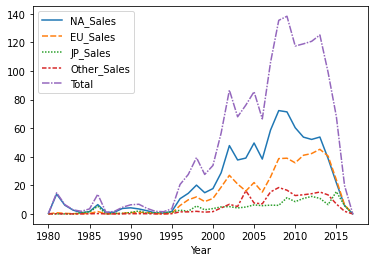

In [ ]:
Ac = Action.groupby(['Year']).sum()
Ac.drop('Age', axis=1,inplace=True)

sns.lineplot(data=Ac)

## cnrk

In [ ]:
pie = df[['Genre', 'Age', 'company', 'Total']].groupby(['Age', 'Genre', 'company']).sum()

Total
Age   Genre     company            
1980s Action    nintendo      24.79
                others        26.31
      Adventure nintendo       4.38
                others         0.40
      Fighting  nintendo       6.47
...                             ...
2010s Sports    xbox         108.80
      Strategy  nintendo       9.71
                pc            17.00
                playstation    6.47
                xbox           2.47

[182 rows x 1 columns]

In [ ]:
df4 = df[df['Year']>2007].sort_values(by=['Total'],ascending=False).iloc[0:1000]
qqqq = pd.crosstab(df4['Genre'],df4['Publisher'])
qqqq

Publisher,505 Games,Activision,Activision Value,Atari,Atlus,Bethesda Softworks,Capcom,City Interactive,Codemasters,Deep Silver,Disney Interactive Studios,Eidos Interactive,Electronic Arts,Focus Home Interactive,GSP,GungHo,Hello Games,Koch Media,Konami Digital Entertainment,Level 5,LucasArts,MTV Games,Majesco Entertainment,Marvelous Entertainment,Mastertronic,Microsoft Game Studios,Midway Games,Mindscape,Mojang,NCSoft,Namco Bandai Games,Nintendo,Sega,Slightly Mad Studios,Sony Computer Entertainment,Sony Computer Entertainment Europe,Square Enix,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Valve,Valve Software,Warner Bros. Interactive Entertainment,Zoo Games
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0,24,0,1,0,4,9,0,0,4,16,4,19,0,0,0,1,1,8,2,16,0,0,1,0,4,0,0,0,1,3,15,2,0,14,1,12,9,20,2,35,0,0,38,0
Adventure,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,3,1,1,1,2,0,2,0,0,0,0
Fighting,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,9,3,0,0,0,0,2,14,0,0,2,0,0,6,0
Misc,0,20,0,0,0,0,0,0,0,0,6,0,3,0,1,0,0,0,0,0,0,7,0,0,0,5,1,1,0,0,1,10,3,0,5,2,0,3,1,0,19,0,0,0,1
Platform,0,3,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,10,0,9,1,0,3,0,0,3,0,0,0,0
Puzzle,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,3,0
Racing,0,0,0,0,0,0,0,0,8,0,4,0,15,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,3,5,1,7,0,0,2,3,0,2,0,0,0,0
Role-Playing,0,8,0,0,1,15,4,0,0,0,0,0,11,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,10,27,3,0,1,0,21,0,0,0,2,0,0,0,0
Shooter,1,38,0,0,0,5,3,1,2,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,2,5,0,12,1,2,2,13,0,18,1,1,0,0


In [ ]:
qqqq['Sum'] = qqqq.sum(axis=1)
qqqq

Publisher,505 Games,Activision,Activision Value,Atari,Atlus,Bethesda Softworks,Capcom,City Interactive,Codemasters,Deep Silver,Disney Interactive Studios,Eidos Interactive,Electronic Arts,Focus Home Interactive,GSP,GungHo,Hello Games,Koch Media,Konami Digital Entertainment,Level 5,LucasArts,MTV Games,Majesco Entertainment,Marvelous Entertainment,Mastertronic,Microsoft Game Studios,Midway Games,Mindscape,Mojang,NCSoft,Namco Bandai Games,Nintendo,Sega,Slightly Mad Studios,Sony Computer Entertainment,Sony Computer Entertainment Europe,Square Enix,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Valve,Valve Software,Warner Bros. Interactive Entertainment,Zoo Games,Sum
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0,24,0,1,0,4,9,0,0,4,16,4,19,0,0,0,1,1,8,2,16,0,0,1,0,4,0,0,0,1,3,15,2,0,14,1,12,9,20,2,35,0,0,38,0,266
Adventure,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,3,1,1,1,2,0,2,0,0,0,0,19
Fighting,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,9,3,0,0,0,0,2,14,0,0,2,0,0,6,0,46
Misc,0,20,0,0,0,0,0,0,0,0,6,0,3,0,1,0,0,0,0,0,0,7,0,0,0,5,1,1,0,0,1,10,3,0,5,2,0,3,1,0,19,0,0,0,1,89
Platform,0,3,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,10,0,9,1,0,3,0,0,3,0,0,0,0,54
Puzzle,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,3,0,13
Racing,0,0,0,0,0,0,0,0,8,0,4,0,15,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,3,5,1,7,0,0,2,3,0,2,0,0,0,0,57
Role-Playing,0,8,0,0,1,15,4,0,0,0,0,0,11,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,10,27,3,0,1,0,21,0,0,0,2,0,0,0,0,108
Shooter,1,38,0,0,0,5,3,1,2,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,2,5,0,12,1,2,2,13,0,18,1,1,0,0,153


Genre,Publisher,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
3,505 Games,14,2,6,20,4,2,2,0,16,30,19,2
4,5pb,5,49,1,0,0,0,0,1,3,2,0,0
8,Abylight,1,0,0,0,0,0,0,0,0,0,0,0
9,Ackkstudios,4,1,0,0,0,0,0,2,0,0,2,1
10,Acquire,1,2,0,0,0,0,0,8,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Yeti,1,7,1,0,0,0,0,0,0,0,0,0
329,Zoo Games,3,1,0,11,0,3,6,0,4,1,4,0
330,Zushi Games,1,0,0,1,0,2,3,1,2,2,3,2
332,dramatic create,1,4,0,0,0,0,0,0,0,0,0,0


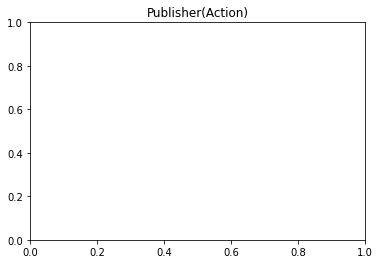

In [ ]:
qqqq = qqqq.T.reset_index()

#deleate_col = qqqq.loc['Action'].drop(qqqq.loc['Action'] == 0)
#label = (qqqq.loc['Action'] = 0).index
#deleate_col
#plt.pie(qqqq.loc['Action'].drop(qqqq.loc['Action'] == 0),labels=deleate_col,autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7f8cfafff310>,
 [Text(1.0418634606407626, 0.352874665259004, '11'),
  Text(0.627824254120266, 0.9032367939462673, '204'),
  Text(0.12367087245434484, 1.0930258529908528, '308'),
  Text(-0.3341055198668091, 1.0480331586331273, '321')],
 [Text(0.5682891603495068, 0.1924770901412749, '10.4%'),
  Text(0.3424495931565087, 0.49267461487978215, '9.9%'),
  Text(0.06745683952055172, 0.5961959198131924, '5.9%'),
  Text(-0.18223937447280494, 0.5716544501635239, '7.5%')])

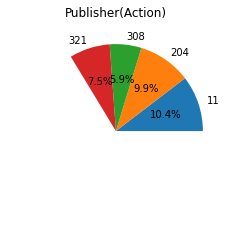

In [ ]:
plt.title('Publisher(Action)')
ac2 = qqqq[qqqq['Action']!=0]
ac2 = ac2['Action']/ac2['Action'].sum()
ac2 = ac2[ac2>0.05]
plt.pie(ac2, labels=ac2.index,autopct='%.1f%%')

In [ ]:
df5 = df[(df['company']=='pc') | (df['company']=='playstation') | (df['company']=='xbox') | (df['company']=='nintendo')]
df5 = pd.crosstab(df5['Genre'], df5['company'])
df5

company,nintendo,pc,playstation,xbox
Genre,,,,
Action,1134,160,1344,538
Adventure,428,65,649,84
Fighting,219,5,436,115
Misc,897,22,557,182
Platform,504,11,256,77
Puzzle,415,25,99,13
Racing,365,56,538,240
Role-Playing,507,103,714,111
Shooter,248,145,485,353


In [ ]:
final = df[df['Year']>2000].sort_values(by=['Total'], ascending=False).iloc[0:1000]
final_cross = pd.crosstab(final['Genre'], final['company'])
final_cross

company,nintendo,pc,playstation,xbox
Genre,,,,
Action,50,1,114,52
Adventure,8,0,7,2
Fighting,5,0,34,7
Misc,62,0,22,11
Platform,49,0,25,0
Puzzle,20,0,1,0
Racing,8,0,39,18
Role-Playing,46,8,35,17
Shooter,7,4,71,66
